<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공신경망(패션 아이템 분류)
입력으로 들어온 10종의 패션 아이템을 맞춰라.

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
import tensorflow as tf
print (tf.__version__)

2.19.0


In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

train_scaled = train_input/ 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

test_scaled = test_input/ 255.0
test_scaled = test_scaled.reshape(-1, 28*28)
print(test_scaled.shape)

sc = SGDClassifier(loss='log_loss',max_iter=5, random_state=42)      # 5번으로는 충분한 학습이 이루어지지 않음
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))


(60000, 784)
(10000, 784)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8379333333333333
0.8104
0.8194166666666666


# 인공신경망(Keras) 11.13

114~126 p 진행함

| 구분 | sigmoid | softmax |
|------|---------|---------|
| 이진/다중 분류 | 이진 분류 | 다중 분류 |
| 사용 용도 | 주로 중간 층의 활성화 함수 | 주로 출력 층의 활성화 함수 |
| 출력 값 범위 | 0~1 사이의 확률값 | 0~1 사이의 확률값 (단, 출력 전체의 합 = 1) |
| 출력 값 의미 | 0.5 이상이면 양성, 이하이면 음성 | 하나의 값에 대해 여러 클래스의 확률을 각각 출력 |


### 출력층 활성화 함수

| 이름 | 수식 / 개념 | 특징 | 사용 사례 |
|------|-------------|------|------------|
| Sigmoid | σ(x) = 1 / (1 + e^(-x)) | 출력 범위 (0, 1); 부드러운 그래디언트; 그래디언트 소실 문제 발생 | 이진 분류, 출력층에서 확률 계산 |
| Softmax | σ(zᵢ) = e^(zᵢ) / Σ e^(zⱼ) | 로짓을 확률로 변환; 출력의 합이 1 | 다중 클래스 분류의 출력층 |


### 은닉층 활성화 함수

| 이름 | 수식 / 개념 | 특징 | 사용 사례 |
|------|-------------|------|------------|
| Tanh | tanh(x) = (e^x − e^(−x)) / (e^x + e^(−x)) | 출력 범위 (-1, 1); 중심이 0; 그래디언트 소실 문제 존재 | 일반 네트워크의 은닉층 |
| ReLU | f(x) = max(0, x) | 계산 효율 높음; dying ReLU 문제 발생 가능 | 딥 네트워크 은닉층 |
| Leaky ReLU | f(x) = x if x > 0 else αx (작은 음수) | dying ReLU 문제 해결; x<0일 때도 작은 그래디언트 허용 | 딥 네트워크 은닉층 |
| Swish | f(x) = x * sigmoid(x) | 부드럽고 비단조적; 딥 네트워크에서 성능 우수 | 딥러닝 모델의 은닉층 |
| ELU | f(x) = x if x > 0 else α(e^x − 1) | 출력이 부드러움; dying ReLU 방지; 중심이 0 | 수렴 성능이 좋은 딥 네트워크 |


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_target[:10])

train_scaled, val_scaled, train_target, val_target = train_test_split (train_scaled, train_target, test_size=0.2, random_state=42)

inputs = keras.Input(shape=(784,))
dense = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([inputs, dense])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)



[9 0 0 3 0 2 7 2 5 5]
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7273 - loss: 0.7936
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8361 - loss: 0.4876
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8465 - loss: 0.4512
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8499 - loss: 0.4439
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8550 - loss: 0.4293
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8516 - loss: 0.4326


[0.44192931056022644, 0.8521666526794434]

## 1. 머신러닝 (Machine Learning)
- **정의:** 데이터를 기반으로 학습하여 예측·분류를 수행하는 알고리즘들의 집합  
- **예시:** 선형 회귀, 의사결정나무, SVM, KNN 등  
- **핵심:** 사람이 **직접 특징(feature)을 추출**하고 모델은 그 특징을 학습함  

---

## 2. 신경망 (Neural Network)
- **정의:** 머신러닝 알고리즘의 구조를 표현한 모델  
- **구성:** 입력층 → 은닉층 → 출력층 (각 층은 뉴런/노드로 구성)  
- **역할:** 머신러닝 알고리즘을 신경망 형태로 구현하는 기본 구조 제공  

---

## 3. 심층 신경망 (Deep Neural Network, DNN)
- **정의:** 은닉층이 여러 개로 구성된 신경망  
- **특징:** 층이 깊어질수록 더 복잡한 패턴 학습 가능  
- **문제점:**  
  - 과적합  
  - 학습 속도 저하  
  - 기울기 소실/폭주 문제  
- **→ 해결을 위해 등장한 기법:** ReLU, Batch Normalization, Dropout 등  

---

## 4. 딥러닝 (Deep Learning)
- **정의:** 심층 신경망(DNN)에 기반한 머신러닝의 하위 분야  
- **특징:**  
  - **특징(feature)을 자동으로 추출**  
  - 이미지·음성·자연어 등 **비정형 데이터 처리에 뛰어남**  
  - GPU를 활용한 병렬 처리로 대규모 데이터 학습 가능
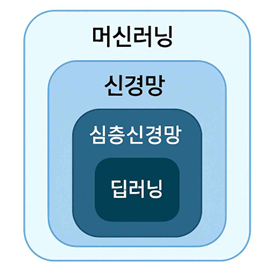

## 심층신경망의 이해
구성요소
- 입력층: 입력 데이터를 받는 부분
- 은닉청: 여러 개의 뉴런이 연결되어 특징을 추출
- 출력층: 최종 예측 결과



학습절차
- Forward Propagation: 입력 → 출력으로 신호전달
- LossComputation: 예측값과 실제값의 차이 계산
- Backpropagation: 오차를 기반으로 가중치 업데이트